## installations

In [1]:
!pip install --upgrade --quiet  langchain-huggingface text-generation transformers google-search-results numexpr langchainhub sentencepiece jinja2 bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.2 MB/s eta 0:00:00


In [2]:
!pip install ragas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.5/119.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.5 MB/s eta 0:00:00


In [33]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.4 MB/s eta 0:00:00


In [39]:
!pip install -U langchain-deepseek

In [ ]:
!pip install python-dotenv

## imports

In [31]:
# llm
from ragas.metrics import ResponseGroundedness, AnswerAccuracy, LLMContextPrecisionWithReference, LLMContextRecall

from ragas.llms import LangchainLLMWrapper
from ragas import evaluate
from ragas import EvaluationDataset
from langchain.chat_models import init_chat_model

In [ ]:
import os
from dotenv import load_dotenv
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib import cm

## set up variables

In [ ]:
# Load environment variables
load_dotenv()

In [30]:
dataset = pd.read_excel("/content/evaluation_dataset_full_xlsx.xlsx")
dataset['reference_contexts'] = dataset['reference_contexts'].apply(ast.literal_eval)
dataset['retrieved_contexts'] = dataset['retrieved_contexts'].apply(ast.literal_eval)
evaluation_dataset = EvaluationDataset.from_pandas(dataset.drop(columns=["reference control", "source"]))

# dataset.drop(columns=["reference control", "source"]).head(2)


In [43]:
metrics = [
    ResponseGroundedness(),
    AnswerAccuracy(),
    LLMContextPrecisionWithReference(),
    LLMContextRecall()
]

In [51]:
llm = init_chat_model("deepseek-chat", model_provider="deepseek", request_timeout=800  )

evaluator_llm = LangchainLLMWrapper(llm)

## evaluate

##### first try

In [36]:
# result

{'non_llm_context_precision_with_reference': 0.5710, 'non_llm_context_recall': 0.4737, 'noise_sensitivity(mode=relevant)': nan, 'nv_response_groundedness': nan, 'nv_accuracy': nan}

##### second try

In [50]:
# result_2

{'non_llm_context_precision_with_reference': 0.5710, 'non_llm_context_recall': 0.4737, 'noise_sensitivity(mode=relevant)': nan, 'nv_response_groundedness': 0.5236, 'nv_accuracy': 0.6250, 'llm_context_precision_with_reference': 0.6601, 'context_recall': 0.8236}

##### third try

In [52]:
result_3 = evaluate(dataset=evaluation_dataset, metrics=metrics, llm=evaluator_llm)

Evaluating:   0%|          | 0/742 [00:00<?, ?it/s]

ERROR:ragas.executor:Exception raised in Job[2]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[9]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[16]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[23]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[30]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[37]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[44]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[51]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[58]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[65]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[72]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[79]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[86]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[93]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[100]: TimeoutError()
ERROR:ragas.executor:Excep

In [53]:
result_3

{'non_llm_context_precision_with_reference': 0.5710, 'non_llm_context_recall': 0.4737, 'noise_sensitivity(mode=relevant)': nan, 'nv_response_groundedness': 0.5377, 'nv_accuracy': 0.6297, 'llm_context_precision_with_reference': 0.6796, 'context_recall': 0.8275}

In [64]:
type(result_3)

ragas.dataset_schema.EvaluationResult

In [66]:
result_3.to_pandas().iloc[:, 5:].mean()

,0
nv_response_groundedness,0.537736
nv_accuracy,0.629717
llm_context_precision_with_reference,0.679578
context_recall,0.827538


## plot results

In [79]:

# Convert the dictionary to a pandas Series and drop NaN values
scores_series = result_3.to_pandas().iloc[:, 5:].mean()

# Convert the Series to a DataFrame for plotting
df = scores_series.reset_index()
df.columns = ['Metric', 'Score']

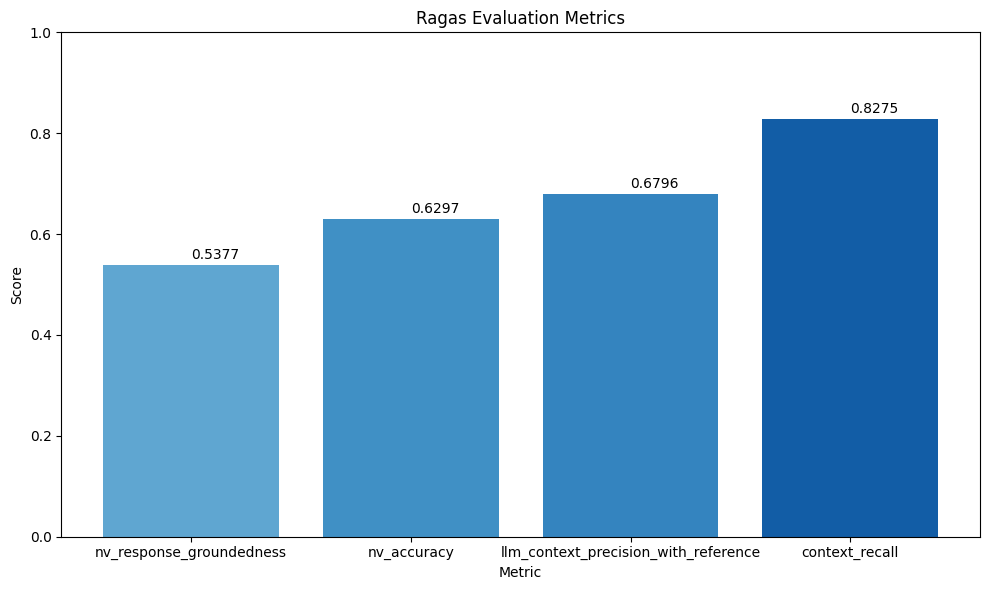

<Figure size 640x480 with 0 Axes>

In [83]:
cmap = cm.Blues
colors = cmap(df['Score'])


# Create the bar chart
plt.figure(figsize=(10, 6));
plt.bar(df['Metric'], df['Score'], color=colors);

# Add labels and title
plt.ylabel('Score')
plt.xlabel('Metric')
plt.title('Ragas Evaluation Metrics')
plt.ylim(0, 1.0) # Scores are typically between 0 and 1

# Add score labels to the bars
for index, value in enumerate(df['Score']):
    plt.text( index, value + 0.02, f'{value:.4f}', va='center')

# Ensure the layout is tight
plt.tight_layout();

plt.show();
# Save the plot
plt.savefig('ragas_evaluation_plot_2.png');

# print("Plot generated and saved as 'ragas_evaluation_plot.png'")